<a href="https://colab.research.google.com/github/pet45/yaw/blob/master/My_Facial_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [1]:
#unzip file 
!unzip -q emotion_images.zip

In [2]:
#GDRIVEPATH='/content/drive/My Drive/ROOT/Work/UoN/CSY3025/dogs-vs-cats/'
GDRIVEPATH=''

In [3]:
import os, shutil

base_dir = base_dir = GDRIVEPATH+'emotion_images'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


            #TRAINING CLASS folder
train_happy_dir = os.path.join(train_dir, 'happy')              # train happy
train_fear_dir = os.path.join(train_dir, 'fear')                # train fear
train_sad_dir = os.path.join(train_dir, 'sad')                  # train sad
train_neutral_dir = os.path.join(train_dir, 'neutral')          # train neutral
train_angry_dir = os.path.join(train_dir, 'angry')              # train angry


            #VALIDATION CLASS folder
validation_happy_dir = os.path.join(validation_dir, 'happy')           # validate happy
validation_fear_dir = os.path.join(validation_dir, 'fear')             # validate fear
validation_sad_dir = os.path.join(validation_dir, 'sad')               # validate sad
validation_neutral_dir = os.path.join(validation_dir, 'neutral')       # validate neutral
validation_angry_dir = os.path.join(validation_dir, 'angry')           # validate angry


             #TESTING CLASS folder
test_happy_dir = os.path.join(test_dir, 'happy')                  # test happy
test_fear_dir = os.path.join(test_dir, 'fear')                    # test fear
test_sad_dir = os.path.join(test_dir, 'sad')                      # test sad
test_neutral_dir = os.path.join(test_dir, 'neutral')              # test neutral
test_angry_dir = os.path.join(test_dir, 'angry')                  # test angry


In [4]:
             #PRINT TRAINING label
print('Total training happy images:', len(os.listdir(train_happy_dir)))        # print label train_happy
print('Total training fear images:', len(os.listdir(train_fear_dir)))          # print label train_fear
print('Total training sad images:', len(os.listdir(train_sad_dir)))            # print label train_sad
print('Total training neutral images:', len(os.listdir(train_neutral_dir)))    # print label train_neutral
print('Total training angry images:', len(os.listdir(train_angry_dir)))        # print label train_angry


             #PRINT VALIDATION label
print('Total validation  happy images:', len(os.listdir(validation_happy_dir)))       # print label validate_happy
print('Total validation  fear images:', len(os.listdir(validation_fear_dir)))         # print label validate_fear
print('Total validation  sad images:', len(os.listdir(validation_sad_dir)))           # print label validate_sad
print('Total validation  neutral images:', len(os.listdir(validation_neutral_dir)))   # print label validate_neutral
print('Total validation  angry images:', len(os.listdir(validation_angry_dir)))       # print label validate_angry


             #PRINT TESTING label
print('Total test  happy images:', len(os.listdir(test_happy_dir)))       # print label test_happy
print('Total test  fear images:', len(os.listdir(test_fear_dir)))         # print label test_fear
print('Total test sad images:', len(os.listdir(test_sad_dir)))            # print label test_sad
print('Total test neutral images:', len(os.listdir(test_neutral_dir)))    # print label test_neutral
print('Total test angry images:', len(os.listdir(test_angry_dir)))        # print label test_angry



Total training happy images: 7164
Total training fear images: 3445
Total training sad images: 4938
Total training neutral images: 4160
Total training angry images: 3367
Total validation  happy images: 1825
Total validation  fear images: 1018
Total validation  sad images: 1139
Total validation  neutral images: 1216
Total validation  angry images: 960
Total test  happy images: 1054
Total test  fear images: 658
Total test sad images: 791
Total test neutral images: 822
Total test angry images: 626


In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         2

In [7]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        color_mode= 'grayscale')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(48, 48),
        batch_size=64,
        class_mode='categorical',
        color_mode= 'grayscale')

Found 23074 images belonging to 5 classes.
Found 6158 images belonging to 5 classes.


In [9]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (64, 48, 48, 1)
labels batch shape: (64, 5)


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 10s 25ms/step - loss: 1.5753 - acc: 0.2952 - val_loss: 1.5691 - val_acc: 0.3133
Epoch 2/50
100/100 [==============================] - 2s 21ms/step - loss: 1.5560 - acc: 0.3243 - val_loss: 1.5816 - val_acc: 0.2820
Epoch 3/50
100/100 [==============================] - 2s 21ms/step - loss: 1.5525 - acc: 0.3236 - val_loss: 1.5682 - val_acc: 0.2930
Epoch 4/50
100/100 [==============================] - 2s 20ms/step - loss: 1.5424 - acc: 0.3284 - val_loss: 1.5685 - val_acc: 0.2977
Epoch 5/50
100/100 [==============================] - 2s 21ms/step - loss: 1.5324 - acc: 0.3304 - val_loss: 1.5276 - val_acc: 0.3203
Epoch 6/50
100/100 [==============================] - 2s 21ms/step - loss: 1.5170 - acc: 0.3480 - val_loss: 1.5024 - val_acc: 0.3695
Epoch 7/50
100/100 [==============================] - 2s 21ms/step - loss: 1.4806 - acc: 0.3728 - val_loss: 1.5051 - val_acc: 0.3320
Epoch 8/50
100/100 [==============================] - 2s 21ms/step -

In [11]:
model.save(GDRIVEPATH+'saved_face_images')

INFO:tensorflow:Assets written to: saved_face_images/assets


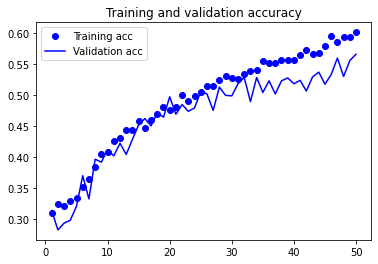

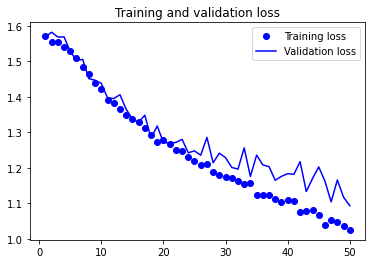

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()